### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [62]:
data = pd.read_csv('sample_data/coupons.csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

<Axes: >

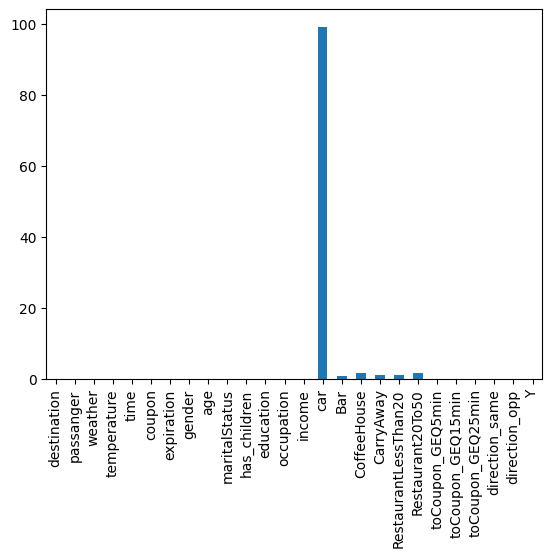

In [64]:
data.isnull().mean().multiply(100).round(2).plot(kind='bar')



3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
data = data.drop('car', axis=1)
data = data.dropna()
data = data.drop_duplicates()



4. What proportion of the total observations chose to accept the coupon?



In [66]:


accepted_coupon = data[data['Y'] == 1].shape[0]
total_observed = data.shape[0]
proportion_accepted = accepted_coupon / total_observed
print(f"Proportion of accepted the coupon: {proportion_accepted}")


Proportion of accepted the coupon: 0.5684184225868244


5. Use a bar plot to visualize the `coupon` column.

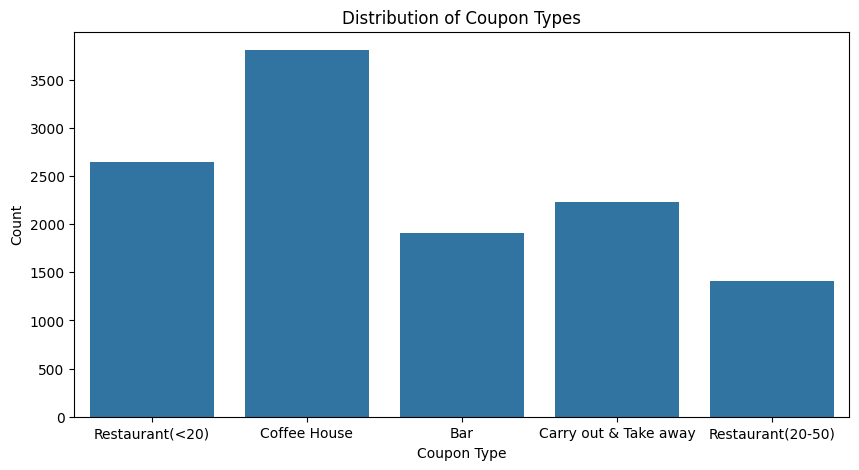

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()



6. Use a histogram to visualize the temperature column.

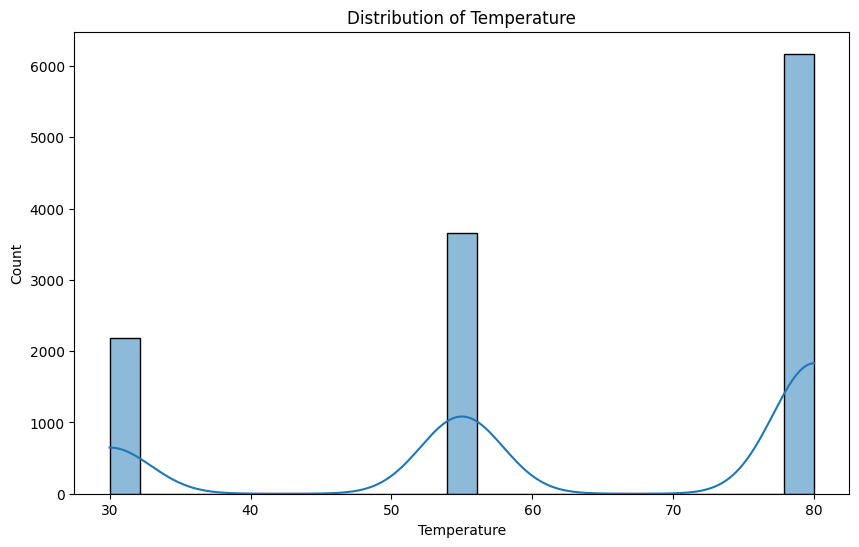

In [68]:

plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [70]:

accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1].shape[0]
total_bar_coupons = bar_coupons.shape[0]
proportion_accepted = accepted_bar_coupons / total_bar_coupons

print(f"proportion of bar coupons were accepted is : {proportion_accepted}")



proportion of bar coupons were accepted is : 0.4118572927597062


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


 Acceptence rate for less than or equal 3:0.37
 Acceptence rate for more than 3 :0.76


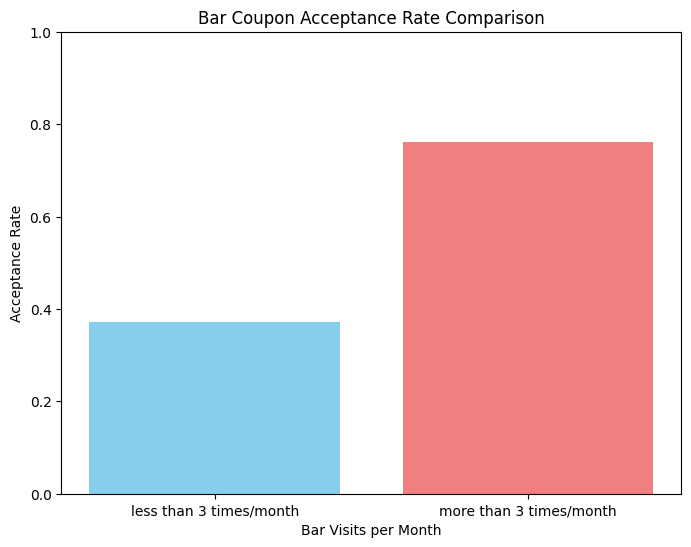

In [71]:

bar_less_than_or_equal_to_3 = bar_coupons[
    ((bar_coupons['Bar'].isin(['1~3', 'less1', 'never']))) &
     (bar_coupons['Y'] == 1)
].shape[0]

total_bar_less_than_or_equal_to_3 = bar_coupons[
    ((bar_coupons['Bar'].isin(['1~3', 'less1', 'never'])))
].shape[0]
acceptence_rate  = bar_less_than_or_equal_to_3/total_bar_less_than_or_equal_to_3


bar_more_than_3 = bar_coupons[
    ((bar_coupons['Bar'].isin(['4~8', 'gt8']))) &
     (bar_coupons['Y'] == 1)
].shape[0]

total_bar_more_than_3 = bar_coupons[
    ((bar_coupons['Bar'].isin(['4~8', 'gt8'])))
].shape[0]

acceptence_rate2  = bar_more_than_3/total_bar_more_than_3


print(f" Acceptence rate for less than or equal 3:{acceptence_rate:.2f}")
print(f" Acceptence rate for more than 3 :{acceptence_rate2:.2f}")


labels = ['less than 3 times/month', 'more than 3 times/month']
acceptance_rates = [acceptence_rate, acceptence_rate2]

plt.figure(figsize=(8, 6))
plt.bar(labels, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Bar Visits per Month')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()










4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for target group: 0.69
Acceptance rate for all other groups: 0.34


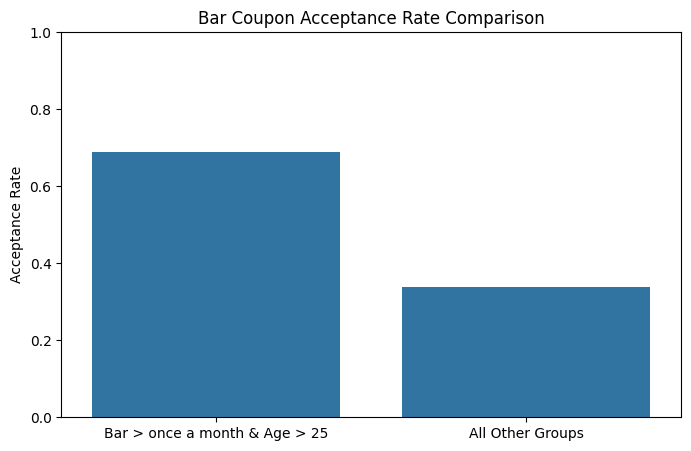

In [72]:
# Calculate acceptance rate for the target group
target_group_accepted = bar_coupons[
    ((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))) &
    ((bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))) &
    (bar_coupons['Y'] == 1)
].shape[0]

target_group_total = bar_coupons[
    ((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))) &
    ((bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
].shape[0]

target_group_rate = target_group_accepted / target_group_total

# Calculate acceptance rate for all other groups
other_groups_accepted = bar_coupons[
    ~(((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))) &
      ((bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))) &
    (bar_coupons['Y'] == 1)
].shape[0]

other_groups_total = bar_coupons[
    ~(((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))) &
      ((bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))))
].shape[0]

other_groups_rate = other_groups_accepted / other_groups_total


print(f"Acceptance rate for target group: {target_group_rate:.2f}")
print(f"Acceptance rate for all other groups: {other_groups_rate:.2f}")

labels = ['Bar > once a month & Age > 25', 'All Other Groups']
rates = [target_group_rate, other_groups_rate]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=rates)
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate for target group : 0.29
Acceptance rate for all other groups : 0.12


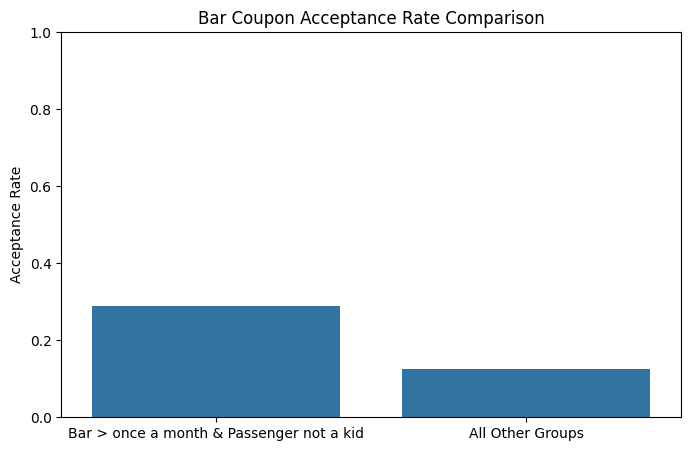

In [73]:
grouped_data = bar_coupons.groupby(['Bar', 'passanger', 'occupation']).agg({'Y': 'count'})


condition_group = grouped_data.loc[
    (grouped_data.index.get_level_values('Bar').isin(['1~3', '4~8', 'gt8'])) &
    (grouped_data.index.get_level_values('passanger') != 'Kid(s)') &
    (~grouped_data.index.get_level_values('occupation').isin(["Farming", "Fishing", "Forestry"]))&
    (grouped_data['Y'] == 1)
].shape[0]

total_ondition_group = grouped_data.loc[
    (grouped_data.index.get_level_values('Bar').isin(['1~3', '4~8', 'gt8'])) &
    (grouped_data.index.get_level_values('passanger') != 'Kid(s)') &
    (~grouped_data.index.get_level_values('occupation').isin(["Farming", "Fishing", "Forestry"]))
].shape[0]

# Calculate the acceptance rate
target_acceptance_rate = condition_group/total_ondition_group

other_condition_group = grouped_data.loc[
    ~(grouped_data.index.get_level_values('Bar').isin(['1~3', '4~8', 'gt8'])) &
    (grouped_data.index.get_level_values('passanger') != 'Kid(s)') &
    (~grouped_data.index.get_level_values('occupation').isin(["Farming", "Fishing", "Forestry"]))&
    (grouped_data['Y'] == 1)
].shape[0]

other_total_ondition_group = grouped_data.loc[
    ~(grouped_data.index.get_level_values('Bar').isin(['1~3', '4~8', 'gt8'])) &
    (grouped_data.index.get_level_values('passanger') != 'Kid(s)') &
    (~grouped_data.index.get_level_values('occupation').isin(["Farming", "Fishing", "Forestry"]))
].shape[0]

other_acceptance_rate = other_condition_group/other_total_ondition_group

print(f"Acceptance rate for target group : {target_acceptance_rate:.2f}")
print(f"Acceptance rate for all other groups : {other_acceptance_rate:.2f}")

labels = ['Bar > once a month & Passenger not a kid', 'All Other Groups']
rates = [target_acceptance_rate, other_acceptance_rate]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=rates)
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [74]:
group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')&
    (bar_coupons['Y'] == 1)
].shape[0]


total_group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
].shape[0]

Acceptence_rate = group1/total_group1


In [75]:
group2 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21' ,'21', '26']))&
    (bar_coupons['Y'] == 1)
].shape[0]

total_group2 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21' ,'21', '26']))
].shape[0]
Acceptence_rate2 = group2/total_group2


In [76]:
group3 = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))&
    (bar_coupons['Y'] == 1)
].shape[0]

total_group3 = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
].shape[0]
Acceptence_rate3 = group3/total_group3


Acceptance rate for group 1: 0.71
Acceptance rate for group 2: 0.72
Acceptance rate for group 3: 0.46


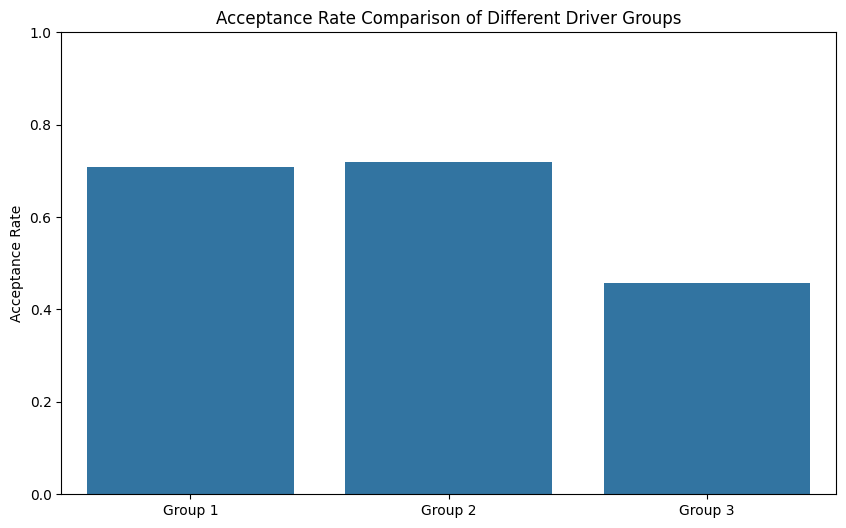

In [77]:
# Calculate acceptance rates for each group
# Print the acceptance rates
print(f"Acceptance rate for group 1: {Acceptence_rate:.2f}")
print(f"Acceptance rate for group 2: {Acceptence_rate2:.2f}")
print(f"Acceptance rate for group 3: {Acceptence_rate3:.2f}")

labels = ['Group 1', 'Group 2', 'Group 3']
rates = [Acceptence_rate, Acceptence_rate2, Acceptence_rate3]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=rates)
plt.title('Acceptance Rate Comparison of Different Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [78]:
# Drivers who accept bar coupons tend to be frequent, specially those visiting more than three times a month.
# Age and passenger type also play a role , over 25 show a higher acceptance rate than others.
# However, having children as passengers appears to negatively impact coupon acceptance within this group.
# Occupation doesn't show an effect in this analysis, but factors such as income and restaurant habits, when combined with bar visits, could subtly influence coupon redemption.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [79]:
# Next I am investigating the Coffe House coupon since it the highest number among other coupons.

coffe_house_coupon = data[data['coupon'] == 'Coffee House']
coffe_house_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [80]:
accepted_coffe_house_coupons = coffe_house_coupon[coffe_house_coupon['Y'] == 1].shape[0]
total_coffe_house_coupons = coffe_house_coupon.shape[0]
proportion_accepted = accepted_coffe_house_coupons / total_coffe_house_coupons

print(f"proportion of coffe house coupons were accepted is : {proportion_accepted: .2f}")



proportion of coffe house coupons were accepted is :  0.50


In [143]:
coffe_house_coupon.groupby(["Bar", "passanger", "income"], as_index = False)["Y"].agg(['count', 'sum', 'mean']).round(2).sort_values(by ='sum')

,Bar,passanger,income,count,sum,mean
23,1~3,Kid(s),$62500 - $74999,2,0,0.00
24,1~3,Kid(s),$75000 - $87499,1,0,0.00
22,1~3,Kid(s),$50000 - $62499,1,0,0.00
34,1~3,Partner,Less than $12500,3,0,0.00
51,4~8,Kid(s),$50000 - $62499,2,0,0.00
...,...,...,...,...,...,...
122,never,Friend(s),$12500 - $24999,81,51,0.63
116,never,Alone,$50000 - $62499,123,56,0.46
115,never,Alone,$37500 - $49999,133,68,0.51
113,never,Alone,$12500 - $24999,151,69,0.46


 Accepted coupons for less than or equal to 3  0.56
Accepted copouns for more than 3 0.67


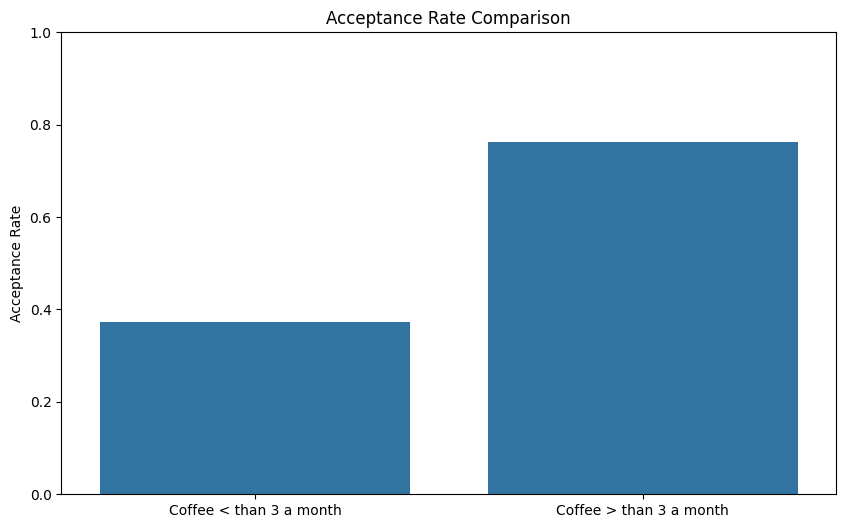

In [142]:
# Coffe House coupon accepted

coffee_less_than_or_equal_to_3 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', 'less1']))&
    coffe_house_coupon['Y']== 1].shape[0]

total_coffee_less_than_or_equal_to_3 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', 'less1']))].shape[0]

coffee_more_than_3 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['4~8', 'gt8']))&
    coffe_house_coupon['Y']== 1].shape[0]

total_coffee_more_than_3 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['4~8', 'gt8']))].shape[0]


acceptance_rate  = coffee_less_than_or_equal_to_3 / total_coffee_less_than_or_equal_to_3
acceptance_rate2  = coffee_more_than_3 / total_coffee_more_than_3

print(f" Accepted coupons for less than or equal to 3  {acceptance_rate:.2f}")
print(f"Accepted copouns for more than 3 {acceptance_rate2:.2f}")

labels = ['Coffee < than 3 a month', 'Coffee > than 3 a month']
rates = [acceptence_rate, acceptence_rate2]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=rates)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()



Acceptance rate for those going to a coffee house more than once a month and over 25 :  0.67
Acceptance rate for all other groups :  0.25


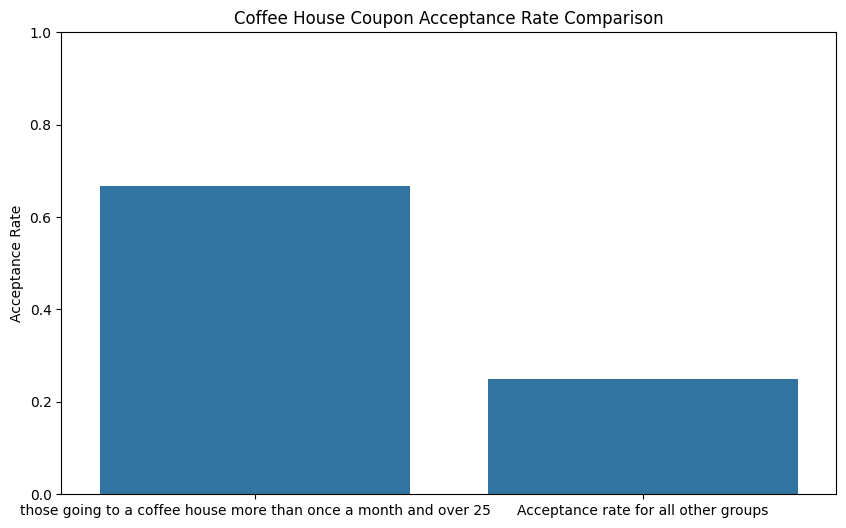

In [141]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

coffee_age_group = coffe_house_coupon.groupby(['CoffeeHouse', 'age']).agg({'Y': 'count'})

# Conditions
target_group = coffee_age_group.loc[
    (coffee_age_group.index.get_level_values('CoffeeHouse').isin(['1~3', '4~8', 'gt8'])) &
    (coffee_age_group.index.get_level_values('age').isin(['26', '31', '36', '41', '46', '50plus']))&
    coffee_age_group['Y'] == 1
].shape[0]

total_target_group = coffee_age_group.loc[
    (coffee_age_group.index.get_level_values('CoffeeHouse').isin(['1~3', '4~8', 'gt8'])) &
    (coffee_age_group.index.get_level_values('age').isin(['26', '31', '36', '41', '46', '50plus']))
].shape[0]

all_other_target_group = coffee_age_group.loc[
    (coffee_age_group.index.get_level_values('CoffeeHouse').isin(['less1','never'])) &
    (coffee_age_group.index.get_level_values('age').isin(['21','below21']))&
    coffee_age_group['Y'] == 1

].shape[0]

total_all_other_target_group = coffee_age_group.loc[
    (coffee_age_group.index.get_level_values('CoffeeHouse').isin(['less1','never'])) &
    (coffee_age_group.index.get_level_values('age').isin(['21','below21']))

].shape[0]

target_acceptance = target_group/total_target_group
all_other_acceptance_rate = all_other_target_group/total_all_other_target_group

# Acceptence rate





print(f"Acceptance rate for those going to a coffee house more than once a month and over 25 : {target_acceptance: .2f}")
print(f"Acceptance rate for all other groups : {all_other_acceptance_rate: .2f}")

labels = ['those going to a coffee house more than once a month and over 25', 'Acceptance rate for all other groups']
acceptance_rates = [target_acceptance, all_other_acceptance_rate]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=acceptance_rates)
plt.title('Coffee House Coupon Acceptance Rate Comparison')

plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


In [140]:
#Use the same process to compare the acceptance rate between drivers who go to bars more than once a month
#and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


condition_group = coffe_house_coupon[
    (coffe_house_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['passanger'].isin != 'Kid(s)') &
    ~(coffe_house_coupon['occupation'].isin(["Farming", "Fishing", "Forestry"]))&
    (coffe_house_coupon['Y'] == 1)
].shape[0]


total_condition_group = coffe_house_coupon[
    (coffe_house_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['passanger'].isin != 'Kid(s)') &
    ~(coffe_house_coupon['occupation'].isin(["Farming", "Fishing", "Forestry"]))
 ].shape[0]
# Calculate the acceptance rate

target_acceptance_rate = condition_group/total_condition_group





print(f"Acceptance rate for target group : {target_acceptance_rate:.2f}")



Acceptance rate for target group : 0.50


In [139]:
#Compare the acceptance rates between those drivers who:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.

In [86]:
from re import A
group1 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['passanger'] != 'Kid(s)') &
    (coffe_house_coupon['maritalStatus'] != 'Widowed')&
    (coffe_house_coupon['Y'] == 1)
].shape[0]

total_group1 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['passanger'] != 'Kid(s)') &
    (coffe_house_coupon['maritalStatus'] != 'Widowed')

].shape[0]

Acceptence_rate = group1/total_group1
Acceptence_rate


0.6596590909090909

In [87]:
group2 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['age'].isin(['below21' ,'21', '26']))&
    (coffe_house_coupon['Y'] == 1)
].shape[0]

total_group2 = coffe_house_coupon[
    (coffe_house_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffe_house_coupon['age'].isin(['below21' ,'21', '26']))

].shape[0]
Acceptence_rate2 = group2/total_group2
Acceptence_rate2


0.686046511627907

In [138]:
group3 = coffe_house_coupon[
    (coffe_house_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (coffe_house_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))&
    (coffe_house_coupon['Y'] == 1)
].shape[0]

total_group3 = coffe_house_coupon[
    (coffe_house_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (coffe_house_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

].shape[0]
Acceptence_rate3 = group3/total_group3
Acceptence_rate3


0.5469845722300141

Acceptance rate for group 1: 0.66
Acceptance rate for group 2: 0.69
Acceptance rate for group 3: 0.55


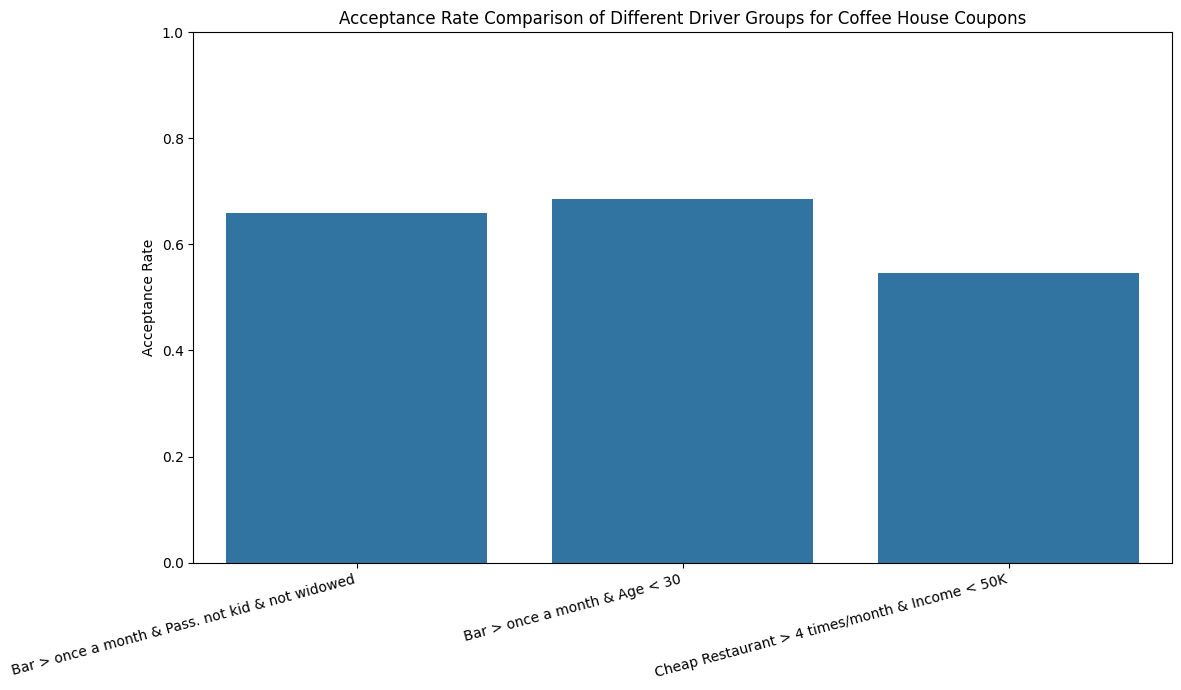

In [101]:

# Print the acceptance rates
print(f"Acceptance rate for group 1: {Acceptence_rate:.2f}")
print(f"Acceptance rate for group 2: {Acceptence_rate2:.2f}")
print(f"Acceptance rate for group 3: {Acceptence_rate3:.2f}")

labels = ['Bar > once a month & Pass. not kid & not widowed', 'Bar > once a month & Age < 30', 'Cheap Restaurant > 4 times/month & Income < 50K']
rates = [Acceptence_rate, Acceptence_rate2, Acceptence_rate3]

plt.figure(figsize=(12, 7))
sns.barplot(x=labels, y=rates)
plt.title('Acceptance Rate Comparison of Different Driver Groups for Coffee House Coupons')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


In [102]:

# There is similarity in the copoun accept pattern between the Bar and Coffee House coupons.
# Visit Frequency: Drivers who frequently visit coffee houses are more inclined to redeem coupons, with those going more than three times a month showing higher acceptance rates.

# Age: Those over 25 who visit coffee houses at least once a month tend to accept coupons more often than younger drivers.

# Passenger Type: Having children as passengers seems to reduce coupon acceptance, whereas drivers traveling with non-child passengers and visiting coffee houses regularly are more likely to redeem them.

# Income & Dining Preferences: Drivers who frequently dine at budget-friendly restaurants and have lower incomes exhibit lower coupon acceptance rates, suggesting that financial constraints and dining habits may influence decisions.

# Marital Status (Widowed): Although its impact is subtler, being widowed may slightly affect coupon redemption. Non-widowed frequent coffee house visitors show a higher acceptance rate.

In [118]:
coffe_house_coupon.groupby(["Bar", "passanger", "income", "weather" ,"temperature" ,"time" ,  "occupation" ], as_index = False)["Y"].agg(['count', 'sum', 'mean']).round(2).sort_values(by ='count')

,Bar,passanger,income,weather,temperature,time,occupation,count,sum,mean
14,1~3,Alone,$100000 or More,Sunny,55,10AM,Student,1,0,0.00
13,1~3,Alone,$100000 or More,Snowy,30,7AM,Unemployed,1,0,0.00
12,1~3,Alone,$100000 or More,Snowy,30,7AM,Protective Service,1,0,0.00
11,1~3,Alone,$100000 or More,Snowy,30,7AM,Management,1,1,1.00
10,1~3,Alone,$100000 or More,Snowy,30,6PM,Personal Care & Service,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1897,never,Alone,Less than $12500,Sunny,80,7AM,Unemployed,8,4,0.50
1892,never,Alone,Less than $12500,Sunny,80,6PM,Unemployed,9,3,0.33
1607,never,Alone,$25000 - $37499,Sunny,80,6PM,Education&Training&Library,9,4,0.44
1548,never,Alone,$12500 - $24999,Sunny,80,6PM,Unemployed,9,4,0.44


In [161]:
# Since we have many unique cobmbinations to choose from; I grouped the coupon data for all the seven categories
# "Bar", "passanger", "income", "weather" ,"temperature" ,"time" ,  "occupation" and used agg function , roughly It looks like  that
# the most accepted coupons were unemployed passengers who never go to the bar drive alone, make between 12500 - 24999 , in the sunny weather and warm
# weather of 80 , usually doing thats in the evening.

In [137]:
group3 = coffe_house_coupon[

    (coffe_house_coupon['income'].isin(['Less than $12500']))&
    (coffe_house_coupon['Bar'].isin(['less1']))&
     (coffe_house_coupon['passanger'].isin(['Alone']))&
      (coffe_house_coupon['weather'].isin(['Sunny']))&
       (coffe_house_coupon['temperature'].isin([80]))&
        (coffe_house_coupon['time'].isin(['6PM']))&
         (coffe_house_coupon['occupation'].isin(['Unemployed']))&
    (coffe_house_coupon['Y'] == 1)



].shape[0]

total_group3 = coffe_house_coupon[

    (coffe_house_coupon['income'].isin(['Less than $12500']))&
    (coffe_house_coupon['Bar'].isin(['less1']))&
     (coffe_house_coupon['passanger'].isin(['Alone']))&
      (coffe_house_coupon['weather'].isin(['Sunny']))&
       (coffe_house_coupon['temperature'].isin([80]))&
        (coffe_house_coupon['time'].isin(['6PM']))&
         (coffe_house_coupon['occupation'].isin(['Unemployed']))

].shape[0]
Acceptence_rate3 = group3/total_group3
Acceptence_rate3

0.3

In [106]:
# The above code confirm the numbers and showes the highest accepted rate among the seven coumns.
# So the groupby function will give us a quickest way to determie what is the highest acceptence rate considering all the combinations.

In [148]:
df = coffe_house_coupon.groupby(["Bar", "passanger", "income", "weather" ,"temperature" ,"time" ,  "occupation" ], as_index = False)["Y"].agg(['count', 'sum', 'mean']).round(2).sort_values(by ='sum')

In [160]:
df.head(956)

,Bar,passanger,income,weather,temperature,time,occupation,count,sum,mean
1061,less1,Alone,$62500 - $74999,Sunny,55,7AM,Arts Design Entertainment Sports & Media,1,0,0.0
2121,never,Friend(s),$75000 - $87499,Sunny,80,6PM,Management,1,0,0.0
2122,never,Friend(s),$75000 - $87499,Sunny,80,6PM,Sales & Related,2,0,0.0
2124,never,Friend(s),$87500 - $99999,Sunny,55,2PM,Management,1,0,0.0
2125,never,Friend(s),$87500 - $99999,Sunny,55,2PM,Retired,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
23,1~3,Alone,$100000 or More,Sunny,55,7AM,Student,3,0,0.0
1525,never,Alone,$12500 - $24999,Sunny,55,7AM,Retired,2,1,0.5
1908,never,Friend(s),$100000 or More,Sunny,80,10AM,Management,1,1,1.0
1513,never,Alone,$12500 - $24999,Sunny,55,10AM,Student,1,1,1.0


In [ ]:
#On the other hand the group that tend to reject the copouns are the first 950 combination and this list can be further investigate to identify
# What factor contribute the most to make the paasenger reject the coupons.
